In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import art3d

In [2]:
int_stats_df = pd.read_pickle("int_stats_df.pkl")
event0_g4_df = pd.read_pickle("event0_g4_df.pkl")
resets_df_micro = pd.read_pickle("resets_df_micro.pkl")
event0_resets_df_micro = pd.read_pickle("event0_resets_df_micro.pkl")
active_pixels_df = pd.read_pickle("active_pixels_df.pkl")
pixel_stats_df = pd.read_pickle("pixel_stats_df.pkl")

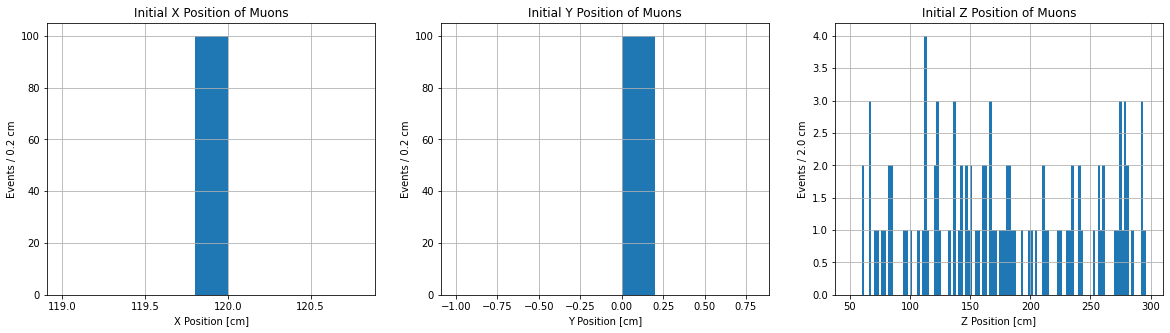

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
int_stats_df["xi_muon"].hist(ax=axes[0], bins=np.arange(119, 121, 0.2))
axes[0].locator_params(axis='x', nbins=6)
axes[0].set_title('Initial X Position of Muons')
axes[0].set_xlabel('X Position [cm]')
axes[0].set_ylabel('Events / 0.2 cm')
int_stats_df["yi_muon"].hist(ax=axes[1], bins=np.arange(-1, 1, 0.2))
axes[1].set_title('Initial Y Position of Muons')
axes[1].set_xlabel('Y Position [cm]')
axes[1].set_ylabel('Events / 0.2 cm')
int_stats_df["zi_muon"].hist(ax=axes[2], bins=np.arange(50, 300, 2))
axes[2].set_title('Initial Z Position of Muons')
axes[2].set_xlabel('Z Position [cm]')
axes[2].set_ylabel('Events / 2.0 cm')
axes[0].plot
axes[1].plot
axes[2].plot
plt.savefig('Muon_Positions.png', dpi=1200)

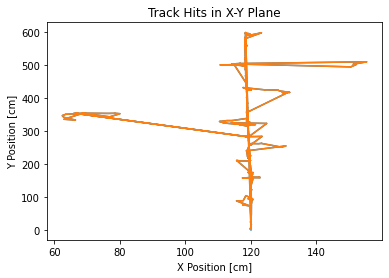

In [4]:
fig = plt.figure()
plt.plot(event0_g4_df.xi, event0_g4_df.yi, event0_g4_df.xf, event0_g4_df.yf)
plt.title("Track Hits in X-Y Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Y Position [cm]")
plt.savefig('HitTracks_XY.png', dpi=1200)

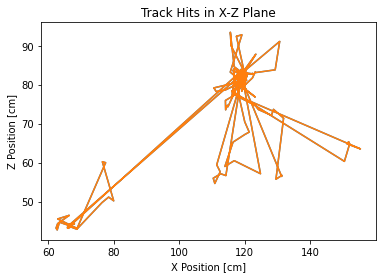

In [5]:
fig = plt.figure()
plt.plot(event0_g4_df.xi,event0_g4_df.zi, event0_g4_df.xf, event0_g4_df.zf)
plt.title("Track Hits in X-Z Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_XZ.png', dpi=1200)

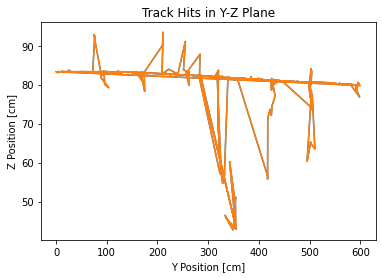

In [6]:
fig = plt.figure()
plt.plot(event0_g4_df.yi, event0_g4_df.zi, event0_g4_df.yf, event0_g4_df.zf)
plt.title("Track Hits in Y-Z Plane")
plt.xlabel("Y Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_YZ.png', dpi=1200)

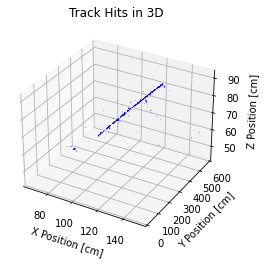

In [7]:
xi_0= event0_g4_df.xi
xf_0= event0_g4_df.xf
yi_0= event0_g4_df.yi
yf_0= event0_g4_df.yf
zi_0= event0_g4_df.zi
zf_0= event0_g4_df.zf

def draw_3d_lines(xi, yi, zi, xf, yf, zf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(xi)):
        line = art3d.Line3D([xi[i], xf[i]], [yi[i], yf[i]], [zi[i], zf[i]], ls='-', lw='0.25', color='b')
        ax.add_line(line)
    
    plt.title("Track Hits in 3D")
    ax.set_xlabel("X Position [cm]")
    ax.set_ylabel("Y Position [cm]")
    ax.set_zlabel("Z Position [cm]")
    ax.set_xlim3d([np.min(xi), np.max(xf)])
    ax.set_ylim3d([np.min(yi), np.max(yf)])
    ax.set_zlim3d([np.min(zi), np.max(zf)])
    ax.plot

draw_3d_lines(xi_0, yi_0, zi_0, xf_0, yf_0, zf_0)
plt.savefig('HitTracks_3D.png', dpi=1200)

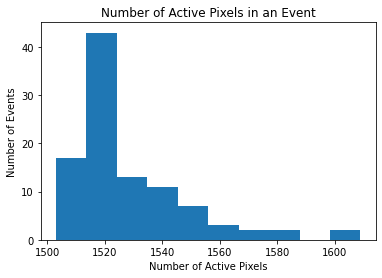

In [8]:
plt.hist(active_pixels_df.active_pixels)
plt.title("Number of Active Pixels in an Event")
plt.xlabel("Number of Active Pixels")
plt.ylabel("Number of Events")
plt.savefig('Active_Pixels_in_Event.png', dpi=1200)

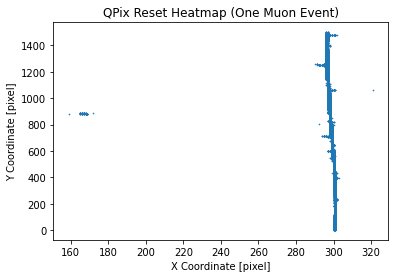

In [9]:
fig = plt.figure()
plt.scatter(event0_resets_df_micro.pixel_x, event0_resets_df_micro.pixel_y, 0.4, cmap='coolwarm')
plt.title("QPix Reset Heatmap (One Muon Event)")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OnePix.png', dpi=1200)

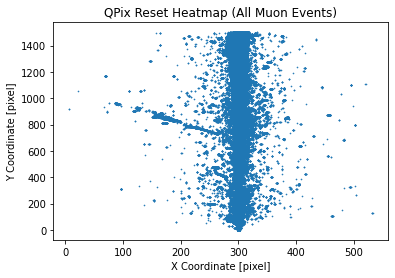

In [10]:
fig = plt.figure()
plt.scatter(resets_df_micro.pixel_x, resets_df_micro.pixel_y, 0.4, cmap='coolwarm')
plt.title("QPix Reset Heatmap (All Muon Events)")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_AllPix.png', dpi=1200)

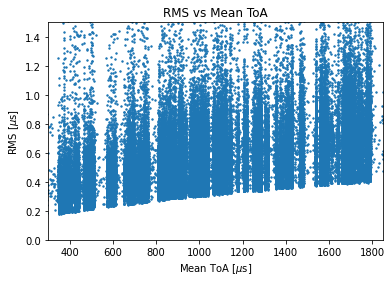

In [11]:
fig = plt.figure()
plt.scatter(pixel_stats_df.mean_ToA, pixel_stats_df.RMS, s=2)
plt.xlim([300, 1850])
plt.ylim([0,1.5])
plt.ylabel("RMS [$\mu$s]")
plt.xlabel("Mean ToA [$\mu$s]")
plt.title("RMS vs Mean ToA")
plt.savefig('MeanReset_vs_RMS_micro_all.png', dpi=1200)

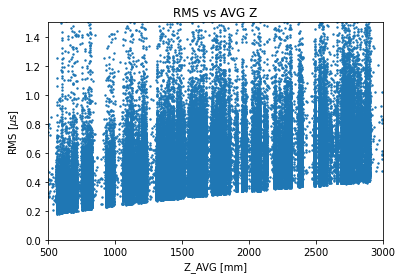

In [12]:
fig = plt.figure()
plt.scatter(pixel_stats_df.mean_ToA*1.618, pixel_stats_df.RMS, s=2)
plt.xlim([500, 3000])
plt.ylim([0,1.5])
plt.ylabel("RMS [$\mu$s]")
plt.xlabel("Z_AVG [mm]")
plt.title("RMS vs AVG Z")
plt.savefig('Z_AVG_vs_RMS_micro_all.png', dpi=1200)